In [8]:
import pandas as pd
df = pd.read_csv("../data/raw/HTRU_2.csv")
df.columns = [
    "mean_ip",
    "std_ip",
    "kurtosis_ip",
    "skewness_ip",
    "mean_dm",
    "std_dm",
    "kurtosis_dm",
    "skewness_dm",
    "target"
]


In [11]:
df.shape

(17897, 9)

In [10]:
df["target"].value_counts()

target
0    16258
1     1639
Name: count, dtype: int64

In [12]:
df["target"].value_counts(normalize=True)

target
0    0.90842
1    0.09158
Name: proportion, dtype: float64

In [14]:
df.isnull().sum()

mean_ip        0
std_ip         0
kurtosis_ip    0
skewness_ip    0
mean_dm        0
std_dm         0
kurtosis_dm    0
skewness_dm    0
target         0
dtype: int64

In [15]:
df.describe()

,mean_ip,std_ip,kurtosis_ip,skewness_ip,mean_dm,std_dm,kurtosis_dm,skewness_dm,target
count,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.00000
mean,111.078321,46.549021,0.477897,1.770417,12.614926,26.326918,8.303574,104.859419,0.09158
std,25.652705,6.843040,1.064056,6.168058,29.473637,19.471042,4.506217,106.517270,0.28844
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.00000
25%,100.929688,42.375426,0.027108,-0.188528,1.923077,14.437330,5.781485,34.957119,0.00000
50%,115.078125,46.946435,0.223241,0.198736,2.801839,18.459977,8.433872,83.068996,0.00000
75%,127.085938,51.022887,0.473349,0.928206,5.464883,28.428152,10.702973,139.310905,0.00000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.00000


In [18]:
import matplotlib.pyplot as plt

X = df.drop("target", axis=1)
y = df["target"]

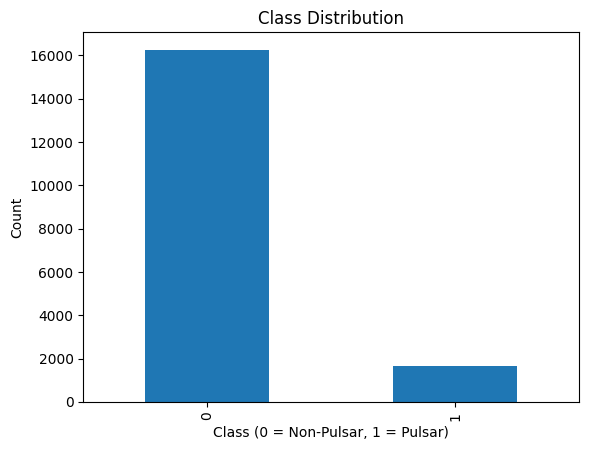

In [19]:
df["target"].value_counts().plot(kind="bar")
plt.title("Class Distribution")
plt.xlabel("Class (0 = Non-Pulsar, 1 = Pulsar)")
plt.ylabel("Count")
plt.show()


In [20]:
print(X.shape)
print(y.shape)


(17897, 8)
(17897,)


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(X_train.shape)
print(X_test.shape)

(14317, 8)
(3580, 8)


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [26]:
model = LogisticRegression(max_iter=1000, class_weight="balanced")

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [31]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.964245810055866

Confusion Matrix:
 [[3150  102]
 [  26  302]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      3252
           1       0.75      0.92      0.83       328

    accuracy                           0.96      3580
   macro avg       0.87      0.94      0.90      3580
weighted avg       0.97      0.96      0.97      3580



In [32]:
feature_importance = pd.Series(model.coef_[0], index=X.columns)
feature_importance = feature_importance.sort_values()

feature_importance

skewness_ip   -0.566075
mean_dm       -0.024692
skewness_dm   -0.007988
std_ip        -0.007103
mean_ip        0.026583
std_dm         0.063474
kurtosis_dm    0.152119
kurtosis_ip    6.607742
dtype: float64

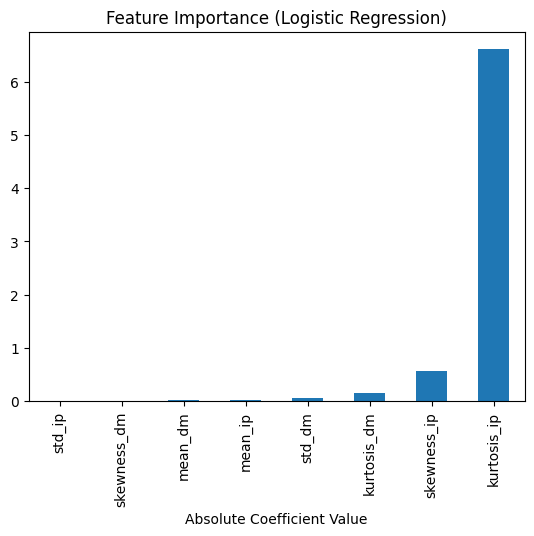

In [39]:
feature_importance.abs().sort_values().plot(kind="bar")
plt.title("Feature Importance (Logistic Regression)")
plt.xlabel("Absolute Coefficient Value")
plt.show()

In [40]:
import seaborn as sns

In [41]:
corr = df.corr()

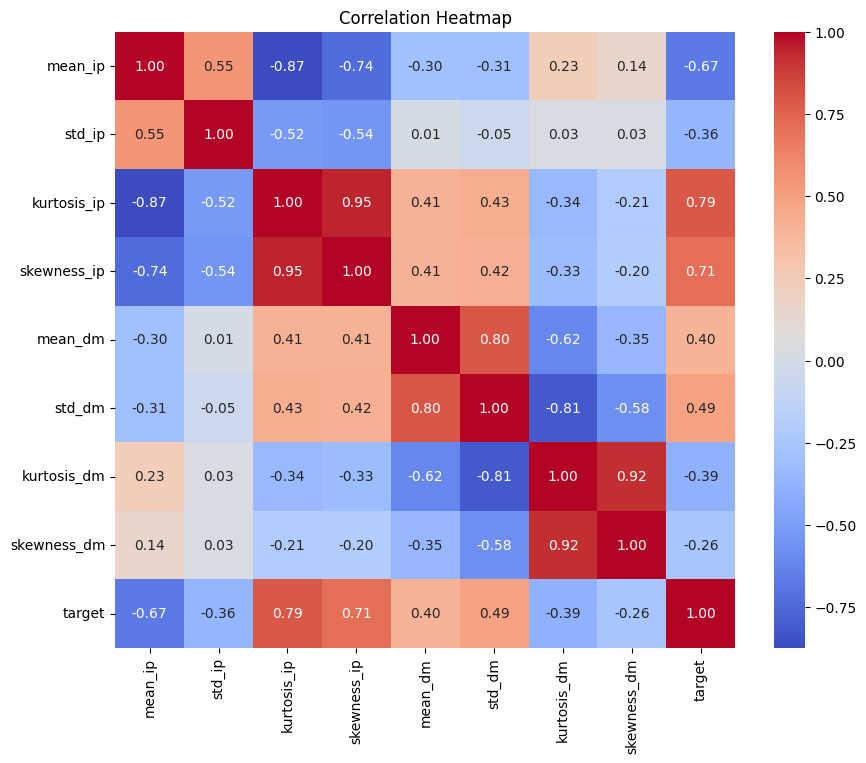

In [42]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()